## 細管の内径測定のシミュレーションを行う

 - シミュレーションフロー
     - 細管の断面を円として内径及び外径を表す式を定義
     - 外径及び内径のある一点における接線を定義
     - シート状になっているであろうレーザー光を光線の集合であると考え、入射角を求める
     - 細管及び空気の屈折率を事前に定義しておくことで、屈折角をスネルの法則より求める
     - 入射した座標と角度から透過光の直線の式を求め、内側の円とも上記と同様のことを行い、入射角、屈折角を求める
     - 細管の材料内を透過しているときは全反射が起こる可能性があるので注意
     - 最終的に観測する位置を設定し円周上で観測するようにする
     - 観測方法は光線に幅をもたせつつ、1つの配列の中にその光線がどれだけ入ったかで大きさを決める
     - 横軸を円弧から直線にして、縦軸に配列内の数値の大きさ(光の強度)をプロット

In [ ]:
#外周の円のある点を通る接線を定義 直径1.3mm
#座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
#接線と直角になっている直線と光線のなす角を入射角として定義
#便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
#この直線と内周の円の方程式から光の通る座標がわかる→同じことを繰り返す
#部材の内部を光が通ってるときは臨界角前後で条件分岐が必要
#以下同じことを繰り返す

import math

#解の公式
def quadratic_formula(a,b,r,x):
    if a==1 or a==-1:
        print("解の公式が適応できません")
        return 0
    else:
        #判別式で直線と交わっているか確かめる
        D = pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))
        if D<0:
            print("光線が内周の円と交わっていません")
            return 0
        elif D == 0:
            print("直線と円が接しています")
        else:
            if x<0:
                return (-a*b-math.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
            elif x==0:
                return x
            elif x>0:
                return (-a*b+math.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
    
#外周の半径を定義
r = int(input("外径の半径を入力(mm)"))
r_i  = int(input("内径の半径を入力(mm)"))
r_h = int(input("光を受け取る位置を入力(mm)(外径の半径よりも大きくすること)"))

xlist = []
ylist = []

#テスト
for x in range(-100,101):
    #とりあえずx=0のときは飛ばす
    if x == 0:
        continue
    #+側のy座標がまずほしい→外周の座標 xはforで回せば良さそう
    y0 = math.sqrt(pow(r,2)-pow(x,2))

    #求めたい角度に必要な2つの直線
    #1.y軸に平行な直線の式はx=h → 0*y+1*x-h=0
    a = 1
    b = 0
    #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
    c = y0
    d = -x


    #二直線，ax+by=0，cx+dy=0 のなす角 θ を求める問題を考える
    #公式1：上記の問題設定のもと，二直線のなす角 θ はtanθ=|ad−bc||ac+bd| を満たす。
    tan = (abs(a*d - b*c))/(abs(a*c + b*d))
    sita_i = math.atan(tan)
    #スネルの法則にひつような入射角のsin
    sin_i = math.sin(sita_i)
    #スネルに法則によって屈折角を求める
    #部材の屈折率は定義が必要
    #空気
    n_i = 1.000292 
    #ガラス管かアクリルかなにか
    n_r = 1.49
    sin_r = n_i*sin_i/n_r
    sita_r = math.asin(sin_r)
    
    #角度ちゃんと取れてる？
    #print("外周の入射角:",sita_i*180/math.pi,"外周の屈折角",sita_r*180/math.pi)
    
    
    #次の直線を生成
    #一点の座標はわかる＋座標回転 sita_r
    #行列で回転できるが・・・
    # 回転した座標を(X,Y)すれば,例としてπ/3
    # x=Xcos(π/3)+Ysin(π/3)=X/2+Y√3/2
    # y=Ycos(π/3)-Xsin(π/3)=Y/2-X√3/2
    #これをもとの式に代入することで新しい式が得られる
    #でもこのやりかただと式変換して方程式得るのめんどくさそう・・・・・・・
    #ベクトル的な考え方でどうにかできないか
    #角度はわかる内周の式に対して角度を適応したら良さそう？？？
    #→180度+θr-θi
    #内径の座標を定義 内径の半径と求めた角度で行けそう → sita_r - sita_i
    #角度がわかるtanで傾きがわかる→直線がわかると思う(解の公式)
    #外周の通過点が-の場合は±√は-
    #tan求め方 x<0のときはx軸起点に考えると時計回りだから-が必要
    if x<0:
        gradient = math.tan(-(math.radians(90)+sita_r-sita_i))
        #print("x=",x,"のときの傾き:",gradient)
    elif x ==0:
        print("x=0")
    elif x>0:
        gradient = math.tan(math.radians(90)+sita_r-sita_i)
        #print("x=",x,"のときの傾き:",gradient)
        
    y_intercept = y0 - gradient * x
    #print("直線の切片:",y_intercept)
    
    x_i = quadratic_formula(gradient,y_intercept,r_i,x)
    y_i = gradient*x_i + y_intercept


    #内径に接する座標と直線がわかる故、上記を繰り返せば良さそう(部材の屈折率が入れ替わる)
    #二直線，ax+by=0，cx+dy=0 のなす角 θ を求める問題を考える
    #公式1：上記の問題設定のもと，二直線のなす角 θ はtanθ=|ad−bc||ac+bd| を満たす。
    print("光が外周を通過する点","x座標:",x,"y座標:",y0)
    print("光が内周を初めに通過するところ","x座標:",x_i,"y座標:",y_i)
    
    
    #内周の屈折角を求める
    #まず   
    #二直線，ax+by=0，cx+dy=0 のなす角 θ を求める問題を考える
    #公式1：上記の問題設定のもと，二直線のなす角 θ はtanθ=|ad−bc||ac+bd| を満たす。
    #求めたい角度に必要な2つの直線
    #1.内周と外周の通過点を結ぶ直線→
    a = -(y_i - y0)
    b = x_i - x
    #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
    #座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
    c = y_i
    d = -x_i
    tan = (abs(a*d - b*c))/(abs(a*c + b*d))
    sita_i_i = math.atan(tan)
    sin_i_i = math.sin(sita_i_i)
    #ここで条件分岐合ったほうが良さそう→∵全反射が起こるため→屈折率によって臨界角が変わる→臨界角を定義し、求めたsita_i_iとの比較を行う
    #臨界角を定義
    n_i_i = 1.49
    n_r_i = 1.000292
    sin_c = n_r_i/n_i_i
    sita_c = math.asin(sin_c)
    
    if sita_c > sita_i_i:
        #屈折しつつ透過
        #屈折角
        sin_r_i = n_i_i*sin_i_i/n_r_i
        sita_r_i = math.asin(sin_r_i)
        #print("内周の屈折角:",sita_r_i*180/math.pi)
        if x_i<0:
            #上と同じで行ける??→むりじゃない？？？？？？
            #水平軸と接線に垂直な直線がなす角を求めよう
            #必要な直線を定義 1.x軸に平行な直線 2.内周に突入した座標における円の接線の垂線
            #1.y=const y=yiでいいか 0*x+1*y=0
            a = 0
            b = 1
            #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
            #座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
            c = y_i
            d = -x_i
            tan = (abs(a*d - b*c))/(abs(a*c + b*d))
            #水平と垂線のなす角→他のとこにも適応できそう
            sita_h_i = math.atan(tan)
            sin_h_i = math.sin(sita_h_i)
            gradient_i = math.tan(-(sita_h_i+sita_r_i))
            #print("x=",x,"のときの傾き:",gradient_i)
        elif x_i ==0:
            print("x_i=0")
        elif x_i>0:
            a = 0
            b = 1
            #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
            #座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
            c = y_i
            d = -x_i
            tan = (abs(a*d - b*c))/(abs(a*c + b*d))
            #水平と垂線のなす角→他のとこにも適応できそう
            sita_h_i = math.atan(tan)
            sin_h_i = math.sin(sita_h_i)
            gradient_i = math.tan(-(math.radians(180)-(sita_h_i+sita_r_i)))

        y_intercept_i = y_i - gradient_i * x_i
        #print("直線の切片:",y_intercept)

        x_i_i = quadratic_formula(gradient_i,y_intercept_i,r_i,x_i)
        y_i_i = gradient_i*x_i_i + y_intercept_i        
        print("光が内周から外側に通過するところ","x座標:",x_i_i,"y座標:",y_i_i)
        #また内部へ突入
        #1.内周と内周の通過点を結ぶ直線
        #二直線，ax+by=0，cx+dy=0 のなす角 θ を求める問題を考える
        #公式1：上記の問題設定のもと，二直線のなす角 θ はtanθ=|ad−bc||ac+bd| を満たす。
        a = -(y_i_i - y_i)
        b = x_i_i - x_i
        #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
        #座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
        c = y_i_i
        d = -x_i_i
        tan = (abs(a*d - b*c))/(abs(a*c + b*d))
        sita_i_i_i = math.atan(tan)
        sin_i_i_i = math.sin(sita_i_i_i)
        
        n_i_i_i = 1.000292
        n_r_i_r = 1.49
        sin_r_i_r = n_i_i_i*sin_i_i_i/n_r_i_r
        sita_r_i_r = math.asin(sin_r_i_r)
        if x_i_i<0:
            #上と同じで行ける??→むりじゃない？？？？？？
            #水平軸と接線に垂直な直線がなす角を求めよう
            #必要な直線を定義 1.x軸に平行な直線 2.内周に突入した座標における円の接線の垂線
            #1.y=const y=yiでいいか 0*x+1*y=0
            a = 0
            b = 1
            #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
            #座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
            c = y_i_i
            d = -x_i_i
            tan = (abs(a*d - b*c))/(abs(a*c + b*d))
            #水平と垂線のなす角
            sita_h_i_r = math.atan(tan)
            sin_h_i_r = math.sin(sita_h_i_r)
            gradient_i_r = math.tan(-(math.radians(180)-(sita_h_i_r+sita_r_i_r)))
            #print("x=",x_i_i,"のときの傾き:",gradient_i_r)
        elif x_i_i ==0:
            print("x_i_i=0")
        elif x_i_i>0:
            a = 0
            b = 1
            #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
            #座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
            c = y_i_i
            d = -x_i_i
            tan = (abs(a*d - b*c))/(abs(a*c + b*d))
            #水平と垂線のなす角
            sita_h_i_r = math.atan(tan)
            sin_h_i_r = math.sin(sita_h_i_r)
            gradient_i_r = math.tan(-(sita_h_i_r+sita_r_i_r))
            
        y_intercept_i_r = y_i_i - gradient_i_r * x_i_i
        #print("直線の切片:",y_intercept)
        #外に出る点
        x_i_i_r = quadratic_formula(gradient_i_r,y_intercept_i_r,r_i,x_i_i)
        y_i_i_r = gradient_i_r*x_i_i_r + y_intercept_i_r        
        #print("円管から外へ出る光!!","x座標:",x_i_i_r,"y座標:",y_i_i_r)
        #次はフォトトランジスタがあるとして光を受け取る場所を考える→結局適当に円を定義して交点を求めれば良さそう→どのくらい円管から離すべき???→円で受け取るから距離は関係ないかな
        #外を出るときの入射角を定義
        #二直線，ax+by=0，cx+dy=0 のなす角 θ を求める問題を考える
        #公式1：上記の問題設定のもと，二直線のなす角 θ はtanθ=|ad−bc||ac+bd| を満たす。
        #1.外周の下と内周の通過点を結ぶ直線
        a = -(y_i_i_r - y_i_i)
        b = x_i_i_r - x_i_i
        #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
        #座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
        c = y_i_i_r
        d = -x_i_i_r
        if a*c + b*d == 0:
            print("最後の角度求めようとしているとき傾きが0")
            continue
        else:
            tan = (abs(a*d - b*c))/(abs(a*c + b*d))
        sita_last_i = math.atan(tan)
        sin_last_i = math.sin(sita_last_i)
        n_last_i = 1.49
        n_last_r = 1.000292
        print("最後の入射角",sita_last_i*180/math.pi)
        #最後の屈折角
        sin_last_r = n_last_i*sin_last_i/n_last_r
        print("最後の屈折角のsin",sin_last_r)
        if sin_last_r > sita_c:
            print("外出れずに全反射してるよ")
        else:
            sita_last_r = math.asin(sin_last_r)
            if sita_c > sita_last_i:
                if x_i_i_r<0:
                    #1.y=const y=yi 0*x+1*y=0
                    a = 0
                    b = 1
                    #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
                    #座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
                    c = y_i_i_r
                    d = -x_i_i_r
                    tan = (abs(a*d - b*c))/(abs(a*c + b*d))
                    #水平と垂線のなす角→他のとこにも適応できそう
                    sita_h_i_last = math.atan(tan)
                    sin_h_i_last = math.sin(sita_h_i_last)
                    gradient_last = math.tan(-(math.radians(180)-(sita_h_i_last+sita_last_r)))
                elif x_i_i_r==0:
                    print("x_i_i_r=0")
                elif x_i_i_r>0:
                    #1.y=const y=yi 0*x+1*y=0
                    a = 0
                    b = 1
                    #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
                    #座標平面において，円：x2+y2=r2 上の点 (x0,y0) における接線の方程式は， x0x+y0y=r2
                    c = y_i_i_r
                    d = -x_i_i_r
                    tan = (abs(a*d - b*c))/(abs(a*c + b*d))
                    #水平と垂線のなす角→他のとこにも適応できそう
                    sita_h_i_last = math.atan(tan)
                    sin_h_i_last = math.sin(sita_h_i_last)
                    gradient_last = math.tan(-(sita_h_i_last+sita_last_r))

                #切片
                y_intercept_last = y_i_i_r - gradient_last * x_i_i_r
                #print("直線の切片:",y_intercept)
                #光を受け取る座標
                x_get = quadratic_formula(gradient_last,y_intercept_last,r_h,x_i_i_r)
                y_get = gradient_last*x_get + y_intercept_last
                print("ほしいx座標",x_get,"ほしいy座標",y_get)
                #グラフ化してプロットする→全反射の方もやる
                xlist.append(x_get)
                ylist.append(y_get)
    else:
        print("内側で全反射やで")
        #全反射
    
    
# #     #スネルの法則にひつような入射角のsin 
# #     sin_i_i = math.sin(sita_i_i)
# #     #スネルに法則によって屈折角を求める
# #     #部材の屈折率は定義が必要
# #     #ガラス化アクリルか
# #     n_i_i = 1.49
# #     #空気
# #     n_r_i = 1.000292 
# #     sin_r_i = n_i_i*sin_i_i/n_r_i


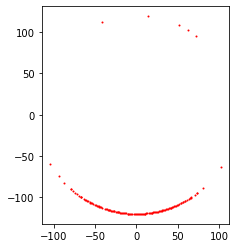

In [3]:
#全反射していないときの受光状態 幅は持たせていない
import matplotlib.pyplot as plt


g = plt.subplot()
g.plot(xlist, ylist, marker="o", color = "red", linestyle = " ",markersize=1)
g.set_aspect('equal')